In [1]:
import numpy as np
import pandas as pd

from malid import io
from malid import config, helpers
import gc
import joblib
from kdict import kdict
import itertools

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from malid.datamodels import GeneLocus, TargetObsColumnEnum

# Isotype counts overall by disease cohort. BCR only.

In [3]:
fold_labels = ["train_smaller", "validation", "test"]

In [4]:
specimen_isotype_counts = []
for fold_id in config.all_fold_ids:
    for fold_label in fold_labels:
        if fold_id == -1 and fold_label == "test":
            # skip: global fold does not have a test set
            continue
        adata = io.load_fold_embeddings(
            fold_id=fold_id,
            fold_label=fold_label,
            gene_locus=GeneLocus.BCR,
            target_obs_column=TargetObsColumnEnum.disease,
            load_isotype_counts_per_specimen=False,  # because not created yet - gets created here!
        )
        df = adata.obs
        for specimen_label, subset_obs in adata.obs.groupby(
            "specimen_label", observed=True
        ):
            # get value counts, but first defensively cast to categorical and remove any unused categories — so we don't mark 0 counts for filtered out isotypes.
            isotype_counts = (
                subset_obs["isotype_supergroup"]
                .astype("category")
                .cat.remove_unused_categories()
                .value_counts()
            )
            specimen_description = subset_obs[["specimen_label", "disease"]].iloc[0]
            specimen_isotype_counts.append(
                {
                    "fold_id": fold_id,
                    "fold_label": fold_label,
                    **isotype_counts.to_dict(),
                    **specimen_description.to_dict(),
                }
            )

        del df, adata
        io.clear_cached_fold_embeddings()
        gc.collect()

2022-12-26 07:05:09,234 - malid.external.scratch_cache - INFO - Caching network file to local machine cache: /users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/fold.0.train_smaller.h5ad -> /srv/scratch/maximz/cache/7f04f4bafb0ade43dcc30c658cb88992fd0cd5728e955bb146f9115a.0.train_smaller.h5ad


Only considering the two last: ['.train_smaller', '.h5ad'].


Only considering the two last: ['.train_smaller', '.h5ad'].


2022-12-26 07:14:13,650 - malid.helpers - WARNING - Not marking any sequences as confident_sequence because those annotations weren't found: [Errno 2] No such file or directory: '/users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/neighborhoods/knn_neighborhood.0.train_smaller.IGHG.embedded_onto.train_smaller.combined_data.filtered.tsv.gz'


2022-12-26 07:14:42,622 - malid.external.scratch_cache - INFO - Caching network file to local machine cache: /users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/fold.0.validation.h5ad -> /srv/scratch/maximz/cache/1a7cd102c4a71eb472da3636203a91984ec407adbc0812ffba2c07c5.0.validation.h5ad


Only considering the two last: ['.validation', '.h5ad'].


Only considering the two last: ['.validation', '.h5ad'].


2022-12-26 07:19:08,305 - malid.helpers - WARNING - Not marking any sequences as confident_sequence because those annotations weren't found: [Errno 2] No such file or directory: '/users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/neighborhoods/knn_neighborhood.0.validation.IGHG.embedded_onto.train_smaller.combined_data.filtered.tsv.gz'


2022-12-26 07:19:26,285 - malid.external.scratch_cache - INFO - Caching network file to local machine cache: /users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/fold.0.test.h5ad -> /srv/scratch/maximz/cache/d23bdbcb1cb8d1c3007da595727fbbab8cc86779ab8967868314f2da.0.test.h5ad


Only considering the two last: ['.test', '.h5ad'].


Only considering the two last: ['.test', '.h5ad'].


2022-12-26 07:26:21,629 - malid.helpers - WARNING - Not marking any sequences as confident_sequence because those annotations weren't found: [Errno 2] No such file or directory: '/users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/neighborhoods/knn_neighborhood.0.test.IGHG.embedded_onto.train_smaller.combined_data.filtered.tsv.gz'


2022-12-26 07:26:46,893 - malid.external.scratch_cache - INFO - Caching network file to local machine cache: /users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/fold.1.train_smaller.h5ad -> /srv/scratch/maximz/cache/4110bb3aa0fb718bb62fede8d6a704d8165d8d6bc349377491f87944.1.train_smaller.h5ad


Only considering the two last: ['.train_smaller', '.h5ad'].


Only considering the two last: ['.train_smaller', '.h5ad'].


2022-12-26 07:37:21,995 - malid.helpers - WARNING - Not marking any sequences as confident_sequence because those annotations weren't found: [Errno 2] No such file or directory: '/users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/neighborhoods/knn_neighborhood.1.train_smaller.IGHG.embedded_onto.train_smaller.combined_data.filtered.tsv.gz'


2022-12-26 07:37:57,567 - malid.external.scratch_cache - INFO - Caching network file to local machine cache: /users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/fold.1.validation.h5ad -> /srv/scratch/maximz/cache/9c85c2a266a883a684e8c5d509b8321d4689380ae1339b1d3a20c9e8.1.validation.h5ad


Only considering the two last: ['.validation', '.h5ad'].


Only considering the two last: ['.validation', '.h5ad'].


2022-12-26 07:42:12,968 - malid.helpers - WARNING - Not marking any sequences as confident_sequence because those annotations weren't found: [Errno 2] No such file or directory: '/users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/neighborhoods/knn_neighborhood.1.validation.IGHG.embedded_onto.train_smaller.combined_data.filtered.tsv.gz'


2022-12-26 07:42:26,270 - malid.external.scratch_cache - INFO - Caching network file to local machine cache: /users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/fold.1.test.h5ad -> /srv/scratch/maximz/cache/ed1f2608e168c24c508b6bfbbe3a18ba1a4680e5c010e34cd184cae6.1.test.h5ad


Only considering the two last: ['.test', '.h5ad'].


Only considering the two last: ['.test', '.h5ad'].


2022-12-26 07:48:48,447 - malid.helpers - WARNING - Not marking any sequences as confident_sequence because those annotations weren't found: [Errno 2] No such file or directory: '/users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/neighborhoods/knn_neighborhood.1.test.IGHG.embedded_onto.train_smaller.combined_data.filtered.tsv.gz'


2022-12-26 07:49:07,928 - malid.external.scratch_cache - INFO - Caching network file to local machine cache: /users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/fold.2.train_smaller.h5ad -> /srv/scratch/maximz/cache/578e6ec41823516592527ab2d5010994f0b640e6b5c16cfd655e655d.2.train_smaller.h5ad


Only considering the two last: ['.train_smaller', '.h5ad'].


Only considering the two last: ['.train_smaller', '.h5ad'].


2022-12-26 07:58:12,137 - malid.helpers - WARNING - Not marking any sequences as confident_sequence because those annotations weren't found: [Errno 2] No such file or directory: '/users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/neighborhoods/knn_neighborhood.2.train_smaller.IGHG.embedded_onto.train_smaller.combined_data.filtered.tsv.gz'


2022-12-26 07:58:41,795 - malid.external.scratch_cache - INFO - Caching network file to local machine cache: /users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/fold.2.validation.h5ad -> /srv/scratch/maximz/cache/08c1068072d49c0e446bca7b2515cc6904c1583e869886f65b95c2db.2.validation.h5ad


Only considering the two last: ['.validation', '.h5ad'].


Only considering the two last: ['.validation', '.h5ad'].


2022-12-26 08:03:15,501 - malid.helpers - WARNING - Not marking any sequences as confident_sequence because those annotations weren't found: [Errno 2] No such file or directory: '/users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/neighborhoods/knn_neighborhood.2.validation.IGHG.embedded_onto.train_smaller.combined_data.filtered.tsv.gz'


2022-12-26 08:03:30,730 - malid.external.scratch_cache - INFO - Caching network file to local machine cache: /users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/fold.2.test.h5ad -> /srv/scratch/maximz/cache/83dcd409138574af7b7b712ce14967e926c14170bff7801b141edb49.2.test.h5ad


Only considering the two last: ['.test', '.h5ad'].


Only considering the two last: ['.test', '.h5ad'].


2022-12-26 08:09:51,120 - malid.helpers - WARNING - Not marking any sequences as confident_sequence because those annotations weren't found: [Errno 2] No such file or directory: '/users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/neighborhoods/knn_neighborhood.2.test.IGHG.embedded_onto.train_smaller.combined_data.filtered.tsv.gz'


2022-12-26 08:10:10,594 - malid.external.scratch_cache - INFO - Caching network file to local machine cache: /users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/fold.-1.train_smaller.h5ad -> /srv/scratch/maximz/cache/8cc5401fe377b72196e57b3b224e0e2f08d9ec61f1d5638f4c1dc03c.-1.train_smaller.h5ad


Only considering the two last: ['.train_smaller', '.h5ad'].


Only considering the two last: ['.train_smaller', '.h5ad'].


2022-12-26 08:24:18,619 - malid.helpers - WARNING - Not marking any sequences as confident_sequence because those annotations weren't found: [Errno 2] No such file or directory: '/users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/neighborhoods/knn_neighborhood.-1.train_smaller.IGHG.embedded_onto.train_smaller.combined_data.filtered.tsv.gz'


2022-12-26 08:25:05,740 - malid.external.scratch_cache - INFO - Caching network file to local machine cache: /users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/fold.-1.validation.h5ad -> /srv/scratch/maximz/cache/d12efe0f72cdefa66ff3f9089960fc16b89c64c2837b4b81d55fb8ed.-1.validation.h5ad


Only considering the two last: ['.validation', '.h5ad'].


Only considering the two last: ['.validation', '.h5ad'].


2022-12-26 08:31:54,435 - malid.helpers - WARNING - Not marking any sequences as confident_sequence because those annotations weren't found: [Errno 2] No such file or directory: '/users/maximz/code/boyd-immune-repertoire-classification/data/data_v_20221224/embedded/unirep_fine_tuned/anndatas_scaled/BCR/neighborhoods/knn_neighborhood.-1.validation.IGHG.embedded_onto.train_smaller.combined_data.filtered.tsv.gz'


In [5]:
specimen_isotype_counts[0]

{'fold_id': 0,
 'fold_label': 'train_smaller',
 'IGHD-M': 53999,
 'IGHG': 9154,
 'IGHA': 4751,
 'specimen_label': 'M111-S001',
 'disease': 'HIV'}

In [6]:
specimen_isotype_counts_df = pd.DataFrame(specimen_isotype_counts)
specimen_isotype_counts_df

,fold_id,fold_label,IGHD-M,IGHG,IGHA,specimen_label,disease
0,0,train_smaller,53999,9154,4751,M111-S001,HIV
1,0,train_smaller,38514,17285,9502,M111-S002,HIV
2,0,train_smaller,30153,6332,4936,M111-S006,HIV
3,0,train_smaller,39525,6422,5790,M111-S008,HIV
4,0,train_smaller,20014,12135,12747,M111-S010,HIV
...,...,...,...,...,...,...,...
1915,-1,validation,128196,9530,14112,M64-105,Healthy/Background
1916,-1,validation,30967,1288,3054,M64-107,Healthy/Background
1917,-1,validation,47644,3234,7800,M64-108,Healthy/Background
1918,-1,validation,35653,4493,3835,M64-110,Healthy/Background


In [7]:
# export
specimen_isotype_counts_df.to_csv(
    config.paths.dataset_specific_metadata / "isotype_counts_by_specimen.tsv",
    sep="\t",
    index=None,
)

In [8]:
# reimport (start here if resuming)
specimen_isotype_counts_df = pd.read_csv(
    config.paths.dataset_specific_metadata / "isotype_counts_by_specimen.tsv", sep="\t"
)
specimen_isotype_counts_df

,fold_id,fold_label,IGHD-M,IGHG,IGHA,specimen_label,disease
0,0,train_smaller,53999,9154,4751,M111-S001,HIV
1,0,train_smaller,38514,17285,9502,M111-S002,HIV
2,0,train_smaller,30153,6332,4936,M111-S006,HIV
3,0,train_smaller,39525,6422,5790,M111-S008,HIV
4,0,train_smaller,20014,12135,12747,M111-S010,HIV
...,...,...,...,...,...,...,...
1915,-1,validation,128196,9530,14112,M64-105,Healthy/Background
1916,-1,validation,30967,1288,3054,M64-107,Healthy/Background
1917,-1,validation,47644,3234,7800,M64-108,Healthy/Background
1918,-1,validation,35653,4493,3835,M64-110,Healthy/Background


In [9]:
specimen_isotype_counts_df.sort_values(
    ["fold_id", "fold_label", "disease", "specimen_label"], inplace=True
)

In [10]:
# subselect to test folds only, and set index
specimen_isotype_counts_df_test_only = specimen_isotype_counts_df[
    specimen_isotype_counts_df["fold_label"] == "test"
]
# confirm only one entry per specimen now
assert not specimen_isotype_counts_df_test_only["specimen_label"].duplicated().any()
specimen_isotype_counts_df_test_only = specimen_isotype_counts_df_test_only.set_index(
    "specimen_label"
).drop(["fold_id", "fold_label"], axis=1)
specimen_isotype_counts_df_test_only

,IGHD-M,IGHG,IGHA,disease
specimen_label,,,,
M369-S001,32383,12530,11143,Covid19
M371-S004,2212,984,580,Covid19
M371-S015,25565,8945,6210,Covid19
M371-S023,13921,2943,6705,Covid19
M371-S028,8690,2427,3131,Covid19
...,...,...,...,...
M454-S035,24390,1409,3027,Lupus
M454-S060,12987,285,2211,Lupus
M456-S001,22161,1003,3957,Lupus


In [11]:
# option 1: for each disease, sum across all specimens. plot totals
specimen_isotype_counts_df_test_only.groupby("disease").sum()

,IGHD-M,IGHG,IGHA
disease,,,
Covid19,564136,227603,144554
HIV,1619180,665588,477996
Healthy/Background,5660308,706235,950002
Lupus,1777864,916200,666068


In [12]:
pd.melt(
    specimen_isotype_counts_df_test_only.groupby("disease").sum().reset_index(),
    id_vars=["disease"],
    value_vars=["IGHD-M", "IGHA", "IGHG"],
)

,disease,variable,value
0,Covid19,IGHD-M,564136
1,HIV,IGHD-M,1619180
2,Healthy/Background,IGHD-M,5660308
3,Lupus,IGHD-M,1777864
4,Covid19,IGHA,144554
5,HIV,IGHA,477996
6,Healthy/Background,IGHA,950002
7,Lupus,IGHA,666068
8,Covid19,IGHG,227603
9,HIV,IGHG,665588


<AxesSubplot:xlabel='disease', ylabel='value'>

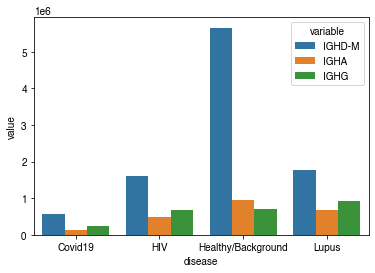

In [13]:
sns.barplot(
    data=pd.melt(
        specimen_isotype_counts_df_test_only.groupby("disease").sum().reset_index(),
        id_vars=["disease"],
        value_vars=["IGHD-M", "IGHA", "IGHG"],
    ),
    x="disease",
    y="value",
    hue="variable",
)

In [14]:
# - option 2: normalize each specimen to sum to 1. for each disease, sum across all specimens. plot totals
import genetools

pd.concat(
    [
        genetools.stats.normalize_rows(
            specimen_isotype_counts_df_test_only[["IGHD-M", "IGHA", "IGHG"]]
        ),
        specimen_isotype_counts_df_test_only["disease"],
    ],
    axis=1,
)

,IGHD-M,IGHA,IGHG,disease
specimen_label,,,,
M369-S001,0.577690,0.198783,0.223526,Covid19
M371-S004,0.585805,0.153602,0.260593,Covid19
M371-S015,0.627824,0.152505,0.219671,Covid19
M371-S023,0.590649,0.284484,0.124867,Covid19
M371-S028,0.609910,0.219750,0.170340,Covid19
...,...,...,...,...
M454-S035,0.846111,0.105009,0.048879,Lupus
M454-S060,0.838791,0.142802,0.018407,Lupus
M456-S001,0.817116,0.145902,0.036982,Lupus


<AxesSubplot:xlabel='disease', ylabel='value'>

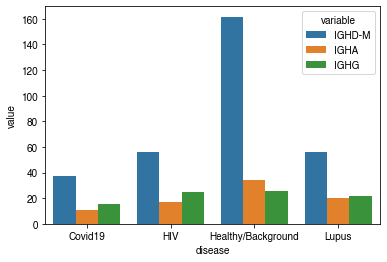

In [15]:
sns.barplot(
    data=pd.melt(
        pd.concat(
            [
                genetools.stats.normalize_rows(
                    specimen_isotype_counts_df_test_only[["IGHD-M", "IGHA", "IGHG"]]
                ),
                specimen_isotype_counts_df_test_only["disease"],
            ],
            axis=1,
        )
        .groupby("disease")
        .sum()
        .reset_index(),
        id_vars=["disease"],
        value_vars=["IGHD-M", "IGHA", "IGHG"],
    ),
    x="disease",
    y="value",
    hue="variable",
)

In [16]:
# - option 3: normalize each specimen to sum to 1. for each disease, sum across all specimens, and normalize those 3 to sum to 1. plot those totals

genetools.stats.normalize_rows(
    pd.concat(
        [
            genetools.stats.normalize_rows(
                specimen_isotype_counts_df_test_only[["IGHD-M", "IGHA", "IGHG"]]
            ),
            specimen_isotype_counts_df_test_only["disease"],
        ],
        axis=1,
    )
    .groupby("disease")
    .sum()
)

,IGHD-M,IGHA,IGHG
disease,,,
Covid19,0.589638,0.169899,0.240464
HIV,0.571463,0.177598,0.250939
Healthy/Background,0.731529,0.153043,0.115428
Lupus,0.573968,0.201870,0.224162


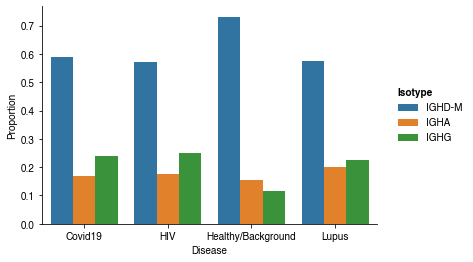

In [17]:
ax = sns.barplot(
    data=pd.melt(
        genetools.stats.normalize_rows(
            pd.concat(
                [
                    genetools.stats.normalize_rows(
                        specimen_isotype_counts_df_test_only[["IGHD-M", "IGHA", "IGHG"]]
                    ),
                    specimen_isotype_counts_df_test_only["disease"],
                ],
                axis=1,
            )
            .groupby("disease")
            .sum()
        )
        .reset_index()
        .rename(columns={"disease": "Disease"}),
        id_vars=["Disease"],
        value_vars=["IGHD-M", "IGHA", "IGHG"],
        var_name="Isotype",
        value_name="Proportion",
    ),
    x="Disease",
    y="Proportion",
    hue="Isotype",
)
sns.despine(ax=ax)
legend_title = "Isotype"
# place legend outside figure
leg = plt.legend(
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    borderaxespad=0.0,
    # no border
    frameon=False,
    # transparent background
    framealpha=0.0,
    # legend title
    title=legend_title,
)
# set legend title to bold - workaround for title_fontproperties missing from old matplotlib versions
leg.set_title(title=legend_title, prop={"weight": "bold", "size": "medium"})
# align legend title left
leg._legend_box.align = "left"

In [18]:
# option 4 should match option 3, but cleaner implementation and description:
# for specimens of each disease type, plot average (+/- std) of isotype proportions

In [19]:
pd.concat(
    [
        genetools.stats.normalize_rows(
            specimen_isotype_counts_df_test_only[["IGHD-M", "IGHA", "IGHG"]]
        ),
        specimen_isotype_counts_df_test_only["disease"],
    ],
    axis=1,
)

,IGHD-M,IGHA,IGHG,disease
specimen_label,,,,
M369-S001,0.577690,0.198783,0.223526,Covid19
M371-S004,0.585805,0.153602,0.260593,Covid19
M371-S015,0.627824,0.152505,0.219671,Covid19
M371-S023,0.590649,0.284484,0.124867,Covid19
M371-S028,0.609910,0.219750,0.170340,Covid19
...,...,...,...,...
M454-S035,0.846111,0.105009,0.048879,Lupus
M454-S060,0.838791,0.142802,0.018407,Lupus
M456-S001,0.817116,0.145902,0.036982,Lupus


In [20]:
isotype_proportions = pd.melt(
    pd.concat(
        [
            genetools.stats.normalize_rows(
                specimen_isotype_counts_df_test_only[["IGHD-M", "IGHA", "IGHG"]]
            ),
            specimen_isotype_counts_df_test_only["disease"],
        ],
        axis=1,
    ).rename(columns={"disease": "Disease"}),
    id_vars=["Disease"],
    value_vars=["IGHD-M", "IGHA", "IGHG"],
    var_name="Isotype",
    value_name="Proportion",
)
isotype_proportions["Isotype"] = isotype_proportions["Isotype"].replace(
    helpers.isotype_friendly_names
)
isotype_proportions

,Disease,Isotype,Proportion
0,Covid19,IgD/M,0.577690
1,Covid19,IgD/M,0.585805
2,Covid19,IgD/M,0.627824
3,Covid19,IgD/M,0.590649
4,Covid19,IgD/M,0.609910
...,...,...,...
1435,Lupus,IgG,0.048879
1436,Lupus,IgG,0.018407
1437,Lupus,IgG,0.036982
1438,Lupus,IgG,0.152331


2022-12-26 08:32:18,684 - fontTools.ttLib.tables._h_e_a_d - WARNING - 'created' timestamp seems very low; regarding as unix timestamp


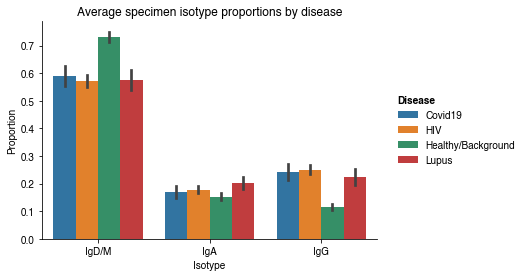

In [21]:
ax = sns.barplot(
    data=isotype_proportions,
    x="Isotype",
    y="Proportion",
    hue="Disease",
    palette=helpers.disease_color_palette,
    # Compute 95% confidence intervals around a sample mean by bootstrapping:
    # sampling distribution of mean generated by repeated sampling and recording mean each time.
    # the standard error is basically the standard deviation of many sample means
    # we plot mean +/- 1.96*standard error. gives you average value +/- X at the 95% confidence level.
    ci=95,
    # ci="sd", # instead draw the standard deviation of the observations, instead of bootstrapping to get 95% confidence intervals
    # capsize=.025
)

sns.despine(ax=ax)
legend_title = "Disease"
# place legend outside figure
leg = plt.legend(
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    borderaxespad=0.0,
    # no border
    frameon=False,
    # transparent background
    framealpha=0.0,
    # legend title
    title=legend_title,
)
# set legend title to bold - workaround for title_fontproperties missing from old matplotlib versions
leg.set_title(title=legend_title, prop={"weight": "bold", "size": "medium"})
# align legend title left
leg._legend_box.align = "left"

ax.set_title("Average specimen isotype proportions by disease")

fig = ax.get_figure()
genetools.plots.savefig(
    fig, config.paths.output_dir / f"isotype_counts_by_disease.png", dpi=300
)
genetools.plots.savefig(
    fig,
    config.paths.high_res_outputs_dir / f"isotype_counts_by_disease.pdf",
)

2022-12-26 08:32:19,260 - fontTools.ttLib.tables._h_e_a_d - WARNING - 'created' timestamp seems very low; regarding as unix timestamp


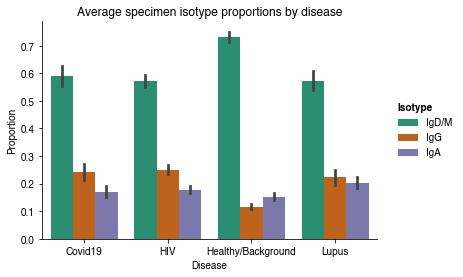

In [22]:
ax = sns.barplot(
    data=isotype_proportions,
    x="Disease",
    y="Proportion",
    hue="Isotype",
    # Compute 95% confidence intervals around a sample mean by bootstrapping:
    # sampling distribution of mean generated by repeated sampling and recording mean each time.
    # the standard error is basically the standard deviation of many sample means
    # we plot mean +/- 1.96*standard error. gives you average value +/- X at the 95% confidence level.
    ci=95,
    # ci="sd", # instead draw the standard deviation of the observations, instead of bootstrapping to get 95% confidence intervals
    # capsize=.025
    hue_order=helpers.isotype_friendly_name_order,
    palette=helpers.isotype_palette,
)

sns.despine(ax=ax)
legend_title = "Isotype"
# place legend outside figure
leg = plt.legend(
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    borderaxespad=0.0,
    # no border
    frameon=False,
    # transparent background
    framealpha=0.0,
    # legend title
    title=legend_title,
)
# set legend title to bold - workaround for title_fontproperties missing from old matplotlib versions
leg.set_title(title=legend_title, prop={"weight": "bold", "size": "medium"})
# align legend title left
leg._legend_box.align = "left"

ax.set_title("Average specimen isotype proportions by disease")

fig = ax.get_figure()
genetools.plots.savefig(
    fig, config.paths.output_dir / f"isotype_counts_by_disease.inverted.png", dpi=300
)
genetools.plots.savefig(
    fig,
    config.paths.high_res_outputs_dir / f"isotype_counts_by_disease.inverted.pdf",
)